# `model_hod` module tutorial notebook

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
import logging 
mpl_logger = logging.getLogger('matplotlib') 
mpl_logger.setLevel(logging.WARNING) 
pil_logger = logging.getLogger('PIL')

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
from dark_emulator import model_hod

In [4]:
hod = model_hod.darkemu_x_hod({"fft_num":8})

initialize cosmo_class
initialize xinl emulator
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator


## how to set cosmology and galaxy parameters (HOD, off-centering, satellite distribution, and incompleteness)

In [5]:
cparam = np.array([0.02225,0.1198,0.6844,3.094,0.9645,-1.])
hod.set_cosmology(cparam)

gparam = {"logMmin":13.13, "sigma_sq":0.22, "logM1": 14.21, "alpha": 1.13, "kappa": 1.25, # HOD parameters
           "poff": 0.2, "Roff": 0.1, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
           "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
           "alpha_inc": 0.44, "logM_inc": 13.57} # incompleteness parameters. For details, see More et al. (2015)
hod.set_galaxy(gparam)

INFO:root:Got same cosmology. Keep quantities already computed.


## how to plot g-g lensing signal in DeltaSigma(R)

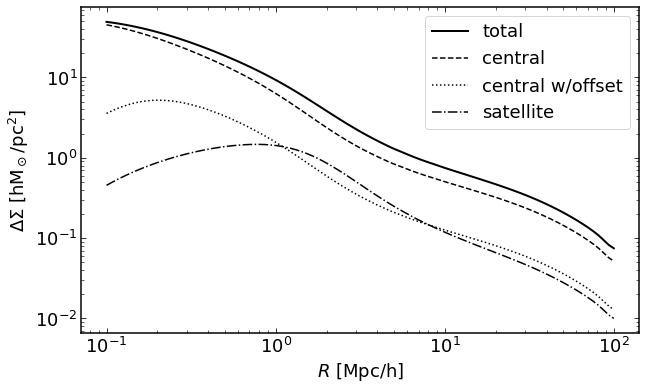

In [6]:
redshift = 0.55
r = np.logspace(-1,2,100)

plt.figure(figsize=(10,6))

plt.loglog(r, hod.get_ds(r, redshift), linewidth = 2, color = "k", label = "total")
plt.loglog(r, hod.get_ds_cen(r, redshift), "--", color = "k", label = "central")
plt.loglog(r, hod.get_ds_cen_off(r, redshift), ":", color = "k", label = "central w/offset")
plt.loglog(r, hod.get_ds_sat(r, redshift), "-.", color = "k", label = "satellite")

plt.xlabel(r"$R$ [Mpc/h]")
plt.ylabel(r"$\Delta\Sigma$ [hM$_\odot$/pc$^2$]")
plt.legend()

## how to plot g-g lensing signal in xi

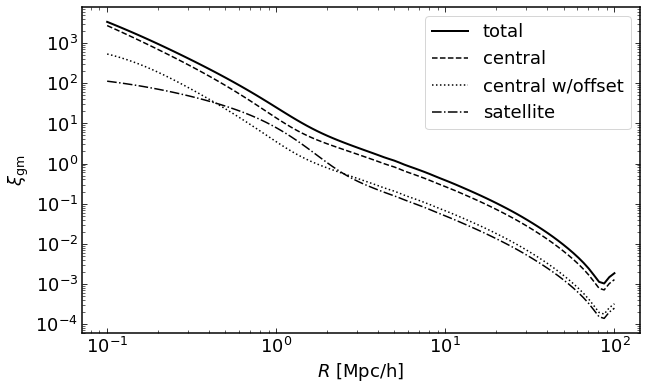

In [7]:
redshift = 0.55
r = np.logspace(-1,2,100)

plt.figure(figsize=(10,6))

plt.loglog(r, hod.get_xi_gm(r, redshift), linewidth = 2, color = "k", label = "total")
plt.loglog(r, hod.get_xi_gm_cen(r, redshift), "--", color = "k", label = "central")
plt.loglog(r, hod.get_xi_gm_cen_off(r, redshift), ":", color = "k", label = "central w/offset")
plt.loglog(r, hod.get_xi_gm_sat(r, redshift), "-.", color = "k", label = "satellite")

plt.xlabel(r"$R$ [Mpc/h]")
plt.ylabel(r"$\xi_{\rm gm}$")
plt.legend()

## how to plot g-g clustering signal in wp

(0.1, 6000.0)

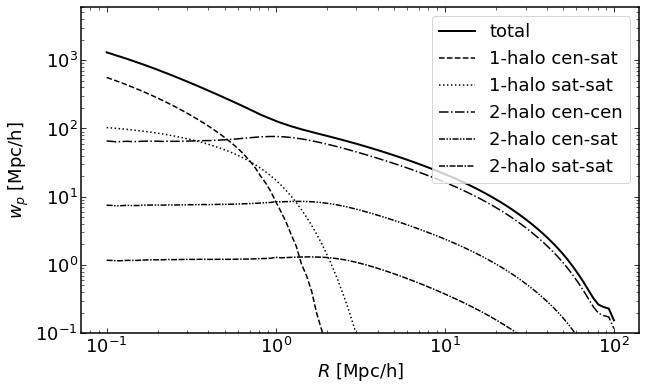

In [8]:
redshift = 0.55
rs = np.logspace(-1,2,100)

plt.figure(figsize=(10,6))

plt.loglog(r, hod.get_wp(r, redshift), linewidth = 2, color = "k", label = "total")
plt.loglog(r, hod.get_wp_1hcs(r, redshift), "--", color = "k", label = "1-halo cen-sat")
plt.loglog(r, hod.get_wp_1hss(r, redshift), ":", color = "k", label = "1-halo sat-sat")
plt.loglog(r, hod.get_wp_2hcc(r, redshift), "-.", color = "k", label = "2-halo cen-cen")
plt.loglog(r, hod.get_wp_2hcs(r, redshift), dashes=[4,1,1,1,1,1], color = "k", label = "2-halo cen-sat")
plt.loglog(r, hod.get_wp_2hss(r, redshift), dashes=[4,1,1,1,4,1], color = "k", label = "2-halo sat-sat")

plt.xlabel(r"$R$ [Mpc/h]")
plt.ylabel(r"$w_p$ [Mpc/h]")
plt.legend()
plt.ylim(0.1, 6e3)

## how to plot g-g clustering signal in xi

(0.001, 6000.0)

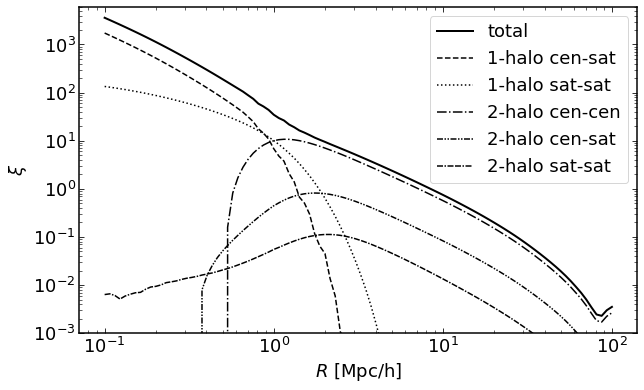

In [9]:
redshift = 0.55
rs = np.logspace(-1,2,100)

plt.figure(figsize=(10,6))

plt.loglog(r, hod.get_xi_gg(r, redshift), linewidth = 2, color = "k", label = "total")
plt.loglog(r, hod.get_xi_gg_1hcs(r, redshift), "--", color = "k", label = "1-halo cen-sat")
plt.loglog(r, hod.get_xi_gg_1hss(r, redshift), ":", color = "k", label = "1-halo sat-sat")
plt.loglog(r, hod.get_xi_gg_2hcc(r, redshift), "-.", color = "k", label = "2-halo cen-cen")
plt.loglog(r, hod.get_xi_gg_2hcs(r, redshift), dashes=[4,1,1,1,1,1], color = "k", label = "2-halo cen-sat")
plt.loglog(r, hod.get_xi_gg_2hss(r, redshift), dashes=[4,1,1,1,4,1], color = "k", label = "2-halo sat-sat")

plt.xlabel(r"$R$ [Mpc/h]")
plt.ylabel(r"$\xi$")
plt.legend()
plt.ylim(1e-3, 6e3)